In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sn
import os
from tensorflow import keras 
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score as cvs

In [33]:
dirPath = "D:\\Aaditya\\PythonProjects\\DiabetesPrediction"
fileName = "Dataset of Diabetes.csv"

In [34]:
df = pd.read_csv(os.path.join(dirPath,fileName))

In [35]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [36]:
df['Gender'] = df['Gender'].replace(['f'],'F')
df['CLASS'] = df['CLASS'].replace(['N '],'N')
df['CLASS'] = df['CLASS'].replace(['Y '],'Y')

In [37]:
G = pd.get_dummies(df['Gender'])
df = pd.concat([df,G],axis='columns')
df.drop(['Gender','M','ID','No_Pation'],axis='columns',inplace=True)

In [38]:
df.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,F
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,1
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0


In [39]:
print(len(df))

1000


In [40]:
G = pd.get_dummies(df['CLASS'])
df = pd.concat([df,G],axis='columns')
df.drop(['CLASS'],axis='columns',inplace=True)

In [41]:
dfNormal = df
for col in df.columns:
    dfNormal[col] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

In [42]:
dfNormal.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,F,N,P,Y
0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,1.0,1.0,0.0,0.0
1,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130,0.0,1.0,0.0,0.0
2,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,1.0,1.0,0.0,0.0
3,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,1.0,1.0,0.0,0.0
4,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565,0.0,1.0,0.0,0.0


In [43]:
print(len(dfNormal))

1000


In [14]:
means = []
stds = []
for col in dfNormal.columns:
    means.append(dfNormal[col].mean())
    stds.append(dfNormal[col].std())

In [15]:
print(dfNormal['AGE'][0])

0.5084745762711864


In [16]:
z = 3
for i in range(len(dfNormal)):
    #print(i)
    flag = False
    for j in range(len(dfNormal.columns)):
        col = dfNormal.columns[j]
        #print(dfNormal[col][i])
        val = dfNormal[col][i]
        if val<means[j]-z*stds[j] or val>means[j]+z*stds[j]:
            flag = True
    if flag ==True:
        dfNormal.drop(i,axis='index',inplace=True)

In [44]:
print(len(dfNormal))

1000


In [45]:
Xcols = dfNormal.columns[:11]
ycols = dfNormal.columns[11:]

In [46]:
ycols

Index(['N', 'P', 'Y'], dtype='object')

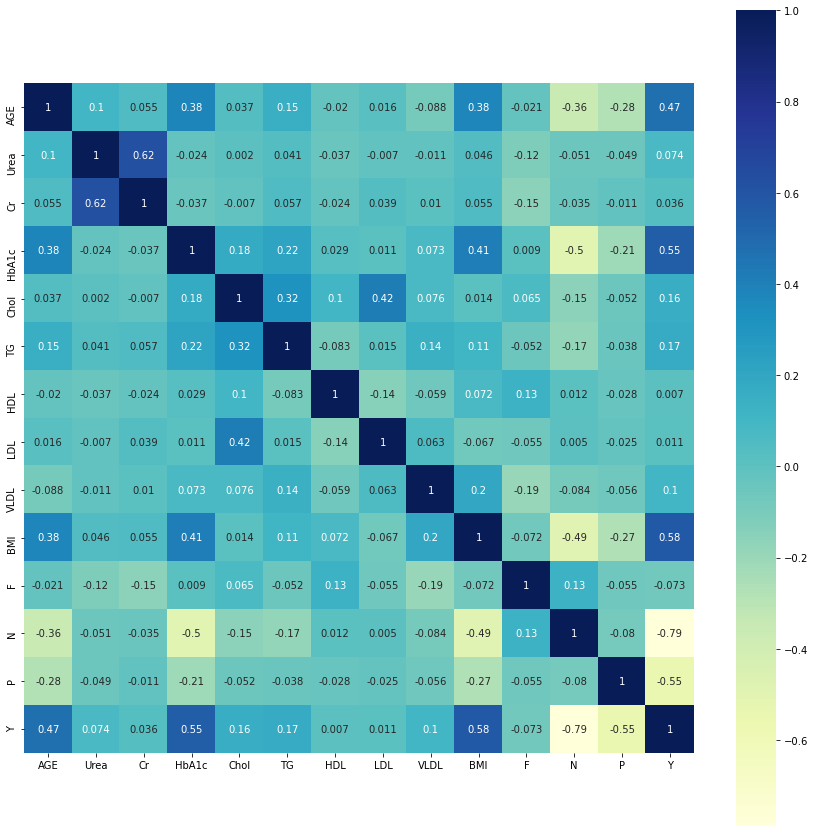

In [99]:
correlation_matrix = dfNormal.corr().round(3)
plt.figure(figsize = (15,15))
dataplot = sn.heatmap(correlation_matrix, cmap="YlGnBu", annot=True,square = True)
plt.show()

In [47]:
X = pd.DataFrame()
for i in range(len(Xcols)):
    X = pd.concat([X,dfNormal[Xcols[i]]],axis='columns')

In [48]:
X.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,F
0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,1.0
1,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130,0.0
2,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,1.0
3,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913,1.0
4,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565,0.0


In [49]:
y = pd.DataFrame()
for i in range(len(ycols)):
    y = pd.concat([y,dfNormal[ycols[i]]],axis='columns')

In [50]:
y.head()

,N,P,Y
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [51]:
print(len(y))
y.value_counts()

1000


N    P    Y  
0.0  0.0  1.0    844
1.0  0.0  0.0    103
0.0  1.0  0.0     53
dtype: int64

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [91]:
def printScore(model,X_test,y_test):
    y_predicted = model.predict(X_test)
    print(classification_report(y_test,y_predicted))
    

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [86]:
forest = RandomForestClassifier(random_state=10)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=10),
                      n_jobs=2)

In [92]:
y_predicted = multi_target_forest.predict(X_test)
printScore(multi_target_forest,X_test,y_test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       1.00      1.00      1.00        10
           2       1.00      0.97      0.98       167

   micro avg       0.99      0.97      0.98       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.99      0.97      0.98       200
 samples avg       0.97      0.97      0.97       200



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
modelNN = keras.Sequential([
    keras.layers.Dense(20,input_shape=(X.shape[1],),activation='relu'),
    keras.layers.Dense(20,input_shape=(X.shape[1],),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(3,activation='sigmoid')
    
])
modelNN.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
modelNN.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7588
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8462
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8462
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8462
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.8462
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.8462
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.8963
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9025
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9087
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9087
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9750
Epoch 83/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9750
Epoch 84/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9737
Epoch 85/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9712
Epoch 86/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9775
Epoch 87/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9725
Epoch 88/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9625
Epoch 89/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9725
Epoch 90/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.9762
Epoch 91/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9762
Epoch 92/200


25/25 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9937
Epoch 164/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9925
Epoch 165/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9875
Epoch 166/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9875
Epoch 167/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9912
Epoch 168/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9950
Epoch 169/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9912
Epoch 170/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9912
Epoch 171/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9925
Epoch 172/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9950
Epoc

In [55]:
modelNN.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9600


[0.15533970296382904, 0.9599999785423279]

In [75]:
y_predicted = modelNN.predict(X_test)
for i in range(len(y_predicted)):
    index = np.argmax(y_predicted[i])
    for j in range(3):
        if j==index:
            y_predicted[i][j]=1.0
        else:
            y_predicted[i][j]=0.0
y_predicted = pd.DataFrame(y_predicted)
y_predicted.rename(columns = {0:'N',1:'P',2:'Y'}, inplace = True)

In [77]:
y_predicted.head()

,N,P,Y
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [88]:
y_test.head()

,N,P,Y
446,0.0,0.0,1.0
86,1.0,0.0,0.0
108,0.0,1.0,0.0
959,0.0,0.0,1.0
782,0.0,0.0,1.0


In [96]:
print(classification_report(y_test,y_predicted))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       1.00      1.00      1.00        10
           2       1.00      0.97      0.98       167

   micro avg       0.99      0.97      0.98       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.99      0.97      0.98       200
 samples avg       0.97      0.97      0.97       200



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
